#ASSIGNMENT 2 -FINANCIAL PROFILES

#Philiswa Mkhuzo- 220005630

Dataset source: Kaggle

Github link: https://github.com/Philiswa-M/Data_Assignment2.git

![[Image]](https://www.ny-noticias.com/wp-content/uploads/2021/04/Financial-Analysis-800x444.jpg)

Background

Loan acquisition among individuals stems from a complex interplay of economic necessity and aspirational investment.  On one hand, unforeseen circumstances like medical emergencies, home repairs, or sudden income loss can necessitate loans to bridge financial gaps and maintain living standards. Additionally, structural factors like low wages or limited access to social safety nets can push individuals towards loans to cover basic needs.

On the other hand, loans are often used strategically to achieve long-term financial goals.  This can include financing higher education, which can lead to increased future earning potential.  Similarly, mortgages enable homeownership, fostering wealth accumulation through asset appreciation.  However, this instrumental use of loans hinges on responsible borrowing practices and a sound understanding of loan terms, particularly interest rates and repayment structures.  High-interest debt can quickly spiral out of control, disproportionately impacting low-income borrowers and jeopardizing their financial stability.

Objective

In this dataset, we will be analyzing a set of financial profiles to understand individuals' debt management practices and overall financial health. By examining factors like outstanding debt, income versus expenses, spending behavior, credit history, and savings habits, we aim to gain valuable insights. This analysis will help us assess their current financial situation, identify areas for improvement, and ultimately develop personalized financial goals and strategies for a secure future.

Library Imports

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
from scipy import stats

In [5]:
import openpyxl

In [6]:
from scipy.stats import gmean

In [7]:
import statsmodels.api as sm

In [8]:
from scipy.stats import kurtosis

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
from scipy.stats import ttest_ind, f_oneway

IMPORTING DATA

In [118]:
df = pd.read_excel(r'Financial_Profile.xlsx')

In [119]:
print(df.head())

  ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0  0x160a,CUS_0xd40,September,Aaron Maashoh,23,82...                                                                                                                                                                                                                                                                                                                                                                        
1  0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-...                                                                                                                          

DATA CLEANING

In [112]:
df = pd.read_excel(r'Financial_Profile.xlsx', sheet_name='Bank Data')

In [113]:
# Remove duplicate rows based on all columns and empty rows

In [114]:
df = df.drop_duplicates()

In [115]:
df = df.dropna()

In [116]:
def has_underscore(row):
    for value in row:
        if isinstance(value, str) and "_" in value:
          return True
        return False

In [117]:
print("Data cleaned successfully!")

Data cleaned successfully!


DESCRIPTIVE ANALYTICS

In [110]:
financial_profile = pd.read_excel(r'Financial_Profile.xlsx', sheet_name='bank_data2')

In [111]:
print(financial_profile.head())

              Name   Age    Occupation Annual Income  Num Bank Accounts  \
0    Aaron Maashoh  23.0     Scientist         19114                3.0   
1    Aaron Maashoh  24.0     Scientist         19114                3.0   
2  Rick Rothackerj  28.0       Teacher         34847                2.0   
3           Langep  35.0      Engineer        143162                1.0   
4           Jasond  55.0  Entrepreneur       3068989                2.0   

   Num Credit Card  Num of Loan  \
0              4.0          4.0   
1              4.0          4.0   
2              4.0          1.0   
3              5.0          3.0   
4              5.0          1.0   

                                        Type of Loan  Delay from due date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                  3.0   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                  3.0   
2                                Credit-Builder Loan                  3.0   
3            Auto Loan, Auto L

In [23]:
means = {}

In [24]:
for col in financial_profile.columns:
  if pd.api.types.is_numeric_dtype(financial_profile[col]):
    if not financial_profile[col].isnull().all():
      means[col] = financial_profile[col].mean()

In [25]:
print("Calculated Means:")

Calculated Means:


In [26]:
for col, mean in means.items():
  print(f"{col}: {mean:.2f}")

Age: 111.12
Num Bank Accounts: 16.94
Num Credit Card: 22.81
Num of Loan: 8.01
Delay from due date: 22.29
Num of Delayed Payment: 30.83
Unnamed: 15: 0.00


In [27]:
stats = {}

In [28]:
cols = ['Age', 'Num of Bank accounts', 'Num of Credit Cards', 'Num of Loans', 'Delay from due date', 'Num of Delayed Payment']

In [29]:

for cols in financial_profile.columns:
  if pd.api.types.is_numeric_dtype(financial_profile[cols]):
    stats[cols] = {
        'Sum': financial_profile[cols].sum(),
        'Count': financial_profile[cols].count(),
        'Median': financial_profile[cols].median(),
        'Mode': financial_profile[cols].mode().iloc[0] if financial_profile[cols].nunique() > 1 else None, 
        'Min': financial_profile[cols].min(),
        'Max': financial_profile[cols].max(),
        'Kurtosis': financial_profile[cols].kurtosis()
    }


In [30]:
print("Calculated Statistics for Sheet2:")

Calculated Statistics for Sheet2:


In [31]:
for cols, stat_dict in stats.items():
  print(f"\nColumn: {cols}")
  for stat, value in stat_dict.items():
    print(f"{stat}: {value}")


Column: Age
Sum: 1720700.0
Count: 15485
Median: 33.0
Mode: 25.0
Min: -500.0
Max: 8639.0
Kurtosis: 88.59523855012412

Column: Num Bank Accounts
Sum: 262257.0
Count: 15485
Median: 6.0
Mode: 6.0
Min: -1.0
Max: 1775.0
Kurtosis: 132.5572318470867

Column: Num Credit Card
Sum: 353231.0
Count: 15485
Median: 6.0
Mode: 5.0
Min: 0.0
Max: 1499.0
Kurtosis: 72.10734739130528

Column: Num of Loan
Sum: 124088.0
Count: 15485
Median: 4.0
Mode: 3.0
Min: 1.0
Max: 1496.0
Kurtosis: 347.74537426480066

Column: Delay from due date
Sum: 345203.0
Count: 15485
Median: 19.0
Mode: 15.0
Min: 0.0
Max: 67.0
Kurtosis: 0.08693640769798794

Column: Num of Delayed Payment
Sum: 477374.0
Count: 15485
Median: 14.0
Mode: 19.0
Min: 0.0
Max: 4343.0
Kurtosis: 224.80233218252602

Column: Unnamed: 15
Sum: 0.0
Count: 1
Median: 0.0
Mode: None
Min: 0.0
Max: 0.0
Kurtosis: nan


In [32]:
def additional_stats(financial_profile):
  stats = {}
  for col in financial_profile.columns:
    if pd.api.types.is_numeric_dtype(financial_profile[col]):
      stats[col] = {
          'First Percentile': np.percentile(financial_profile[col], 1),
          'Second Percentile': np.percentile(financial_profile[col], 2),
          'Third Percentile': np.percentile(financial_profile[col], 3),
          'Fourth Percentile': np.percentile(financial_profile[col], 4),
          'Variance': financial_profile[col].var(),
          'Std Dev': financial_profile[col].std(),
          'Coefficient of Variation': financial_profile[col].std() / financial_profile[col].mean(skipna=True) 
      }
    return pd.DataFrame(stats)

In [33]:
cols = ['Age', 'Num Bank Accounts', 'Num Credit Card', 'Num of Loan', 'Delay from due date', 'Num of Delayed Payment']

In [34]:
correlation = financial_profile[cols].corr()

In [35]:
variance = financial_profile[cols].var()

In [36]:
print("Correlation Matrix for Selected Columns:")
print(correlation.to_string())

Correlation Matrix for Selected Columns:
                             Age  Num Bank Accounts  Num Credit Card  Num of Loan  Delay from due date  Num of Delayed Payment
Age                     1.000000           0.008778         0.013092     0.003953             0.015452                0.003907
Num Bank Accounts       0.008778           1.000000         0.009310     0.001385             0.028260                0.001208
Num Credit Card         0.013092           0.009310         1.000000     0.004823             0.010779                0.000943
Num of Loan             0.003953           0.001385         0.004823     1.000000             0.010556                0.006498
Delay from due date     0.015452           0.028260         0.010779     0.010556             1.000000                0.013810
Num of Delayed Payment  0.003907           0.001208         0.000943     0.006498             0.013810                1.000000


In [37]:
print("\nVariance for Selected Columns:")
print(variance.to_string())


Variance for Selected Columns:
Age                       467848.680340
Num Bank Accounts          13360.522408
Num Credit Card            16352.520012
Num of Loan                 4169.480316
Delay from due date          230.812841
Num of Delayed Payment     47305.032532


|MECHANISTIC ANALYTICS: REGRESSION METHOD

In [121]:
data = pd.read_excel(r'Financial_Profile.xlsx', sheet_name='bank_data2')
target_variable = "Age"

independent_variables = ['Num Bank Accounts', 'Num Credit Card', 'Num of Loan', 'Delay from due date', 'Num of Delayed Payment']

y = data[target_variable]
X = data[independent_variables]

print(X.isnull().sum())

y_array = np.asarray(y)
X_array = np.asarray(X)

X_filled = X.fillna(X.mean())  
X_array = np.asarray(X_filled)

model = sm.OLS(y_array, X_array).fit()
print(model.summary())

Num Bank Accounts         1033090
Num Credit Card           1033090
Num of Loan               1033090
Delay from due date       1033090
Num of Delayed Payment    1033090
dtype: int64
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                     nan
Model:                            OLS   Adj. R-squared (uncentered):                nan
Method:                 Least Squares   F-statistic:                                nan
Date:                Wed, 10 Apr 2024   Prob (F-statistic):                         nan
Time:                        21:59:38   Log-Likelihood:                             nan
No. Observations:             1048575   AIC:                                        nan
Df Residuals:                 1048570   BIC:                                        nan
Df Model:                           5                                                  
Covariance Type:         

VISUAL REPRESENTATION

In [66]:
import seaborn as sns

In [106]:
financial_profile = pd.read_excel(r'Financial_Profile.xlsx', sheet_name='bank_data2')

<Axes: xlabel='Delay from due date', ylabel='Num of Delayed Payment'>

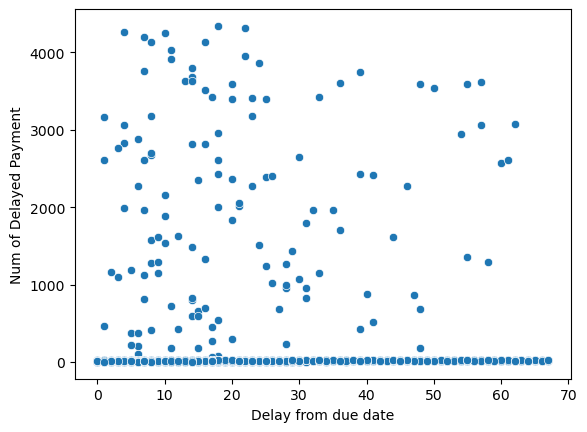

In [107]:
sns.scatterplot(x='Delay from due date', y='Num of Delayed Payment', data=financial_profile)

<Axes: xlabel='Num of Delayed Payment', ylabel='Num of Loan'>

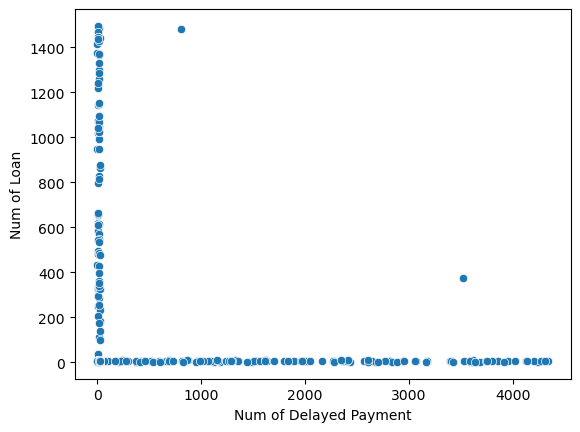

In [108]:
sns.scatterplot(x='Num of Delayed Payment', y='Num of Loan', data=financial_profile)

<Axes: xlabel='Num of Loan', ylabel='Num Bank Accounts'>

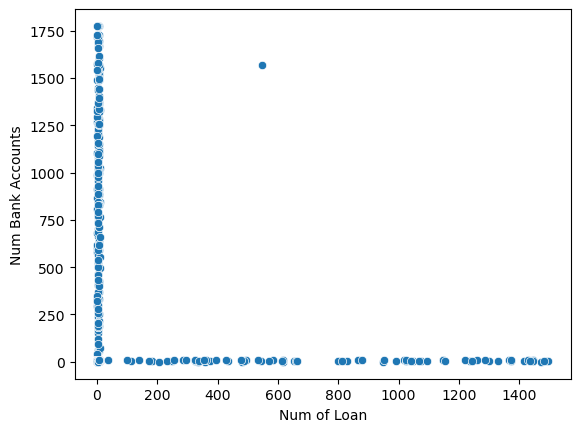

In [70]:
sns.scatterplot(x='Num of Loan', y='Num Bank Accounts', data=financial_profile)

In [71]:
professions_loans = financial_profile.groupby('Occupation')['Num of Loan'].count().reset_index()

In [72]:
import matplotlib.pyplot as plt

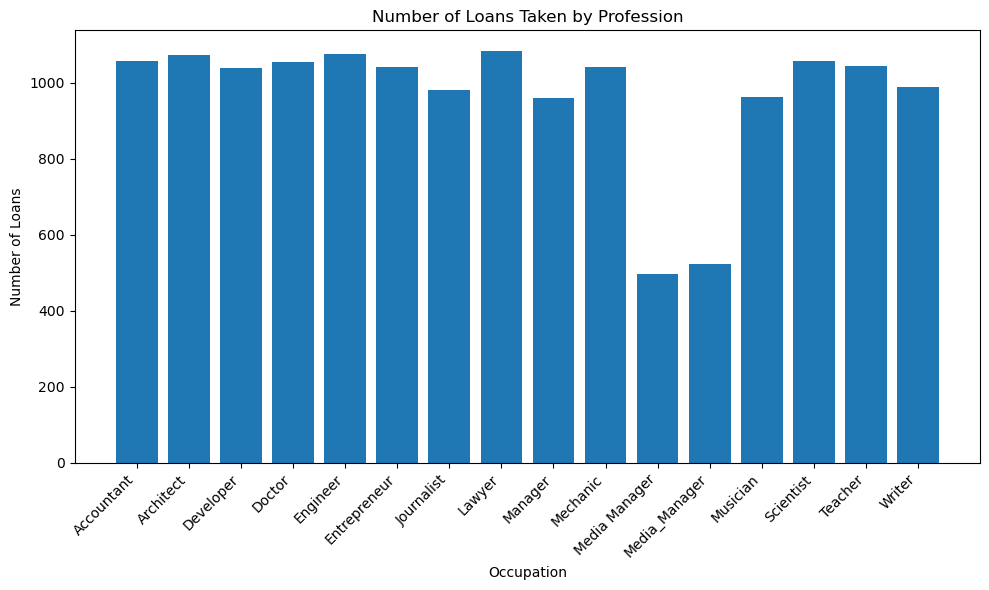

In [122]:
plt.figure(figsize=(10, 6))
plt.bar(professions_loans['Occupation'], professions_loans['Num of Loan'])
plt.xlabel('Occupation')
plt.ylabel('Number of Loans')
plt.title('Number of Loans Taken by Profession')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [74]:
professions = financial_profile.groupby('Occupation')

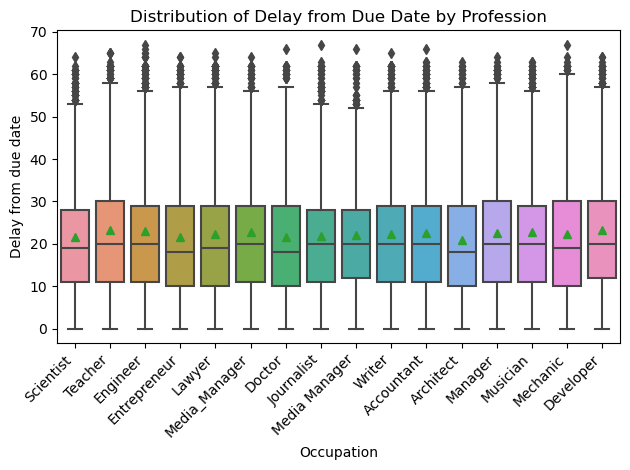

In [75]:
sns.boxplot(x='Occupation', y='Delay from due date', showmeans=True, data=financial_profile)
plt.title('Distribution of Delay from Due Date by Profession')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

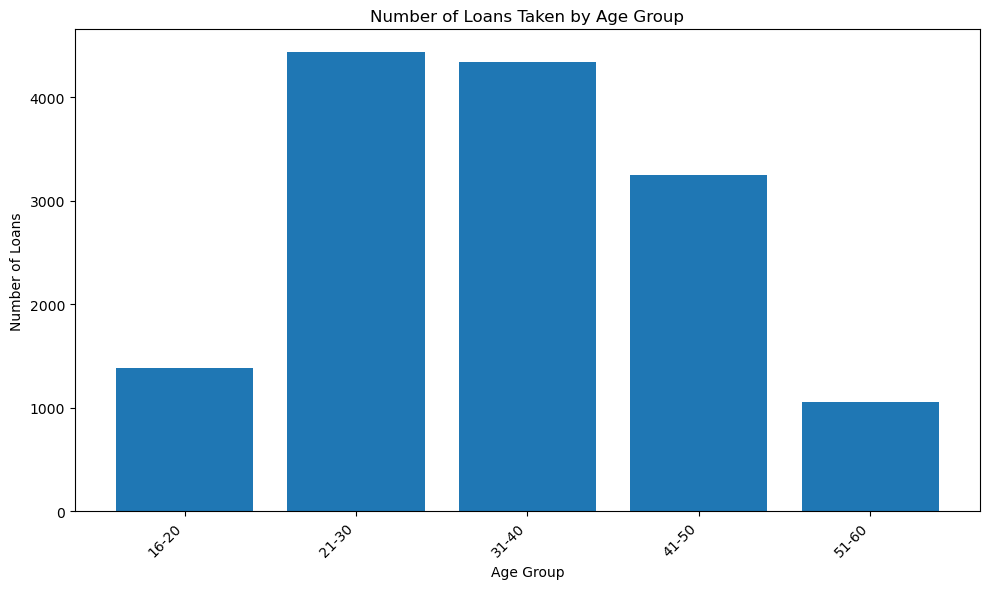

In [123]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

financial_profile = pd.read_excel(r'Financial_Profile.xlsx', sheet_name='bank_data2')
bins = [16, 20, 30, 40, 50, 60]


age_groups = pd.cut(financial_profile['Age'], bins=bins, labels=['16-20', '21-30', '31-40', '41-50', '51-60'])
age_groups_loans = financial_profile.groupby(age_groups)['Num of Loan'].count().reset_index()

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_groups_loans['Age'], age_groups_loans['Num of Loan'])
plt.xlabel('Age Group')
plt.ylabel('Number of Loans')
plt.title('Number of Loans Taken by Age Group')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

COVARIANCE ANALYSIS

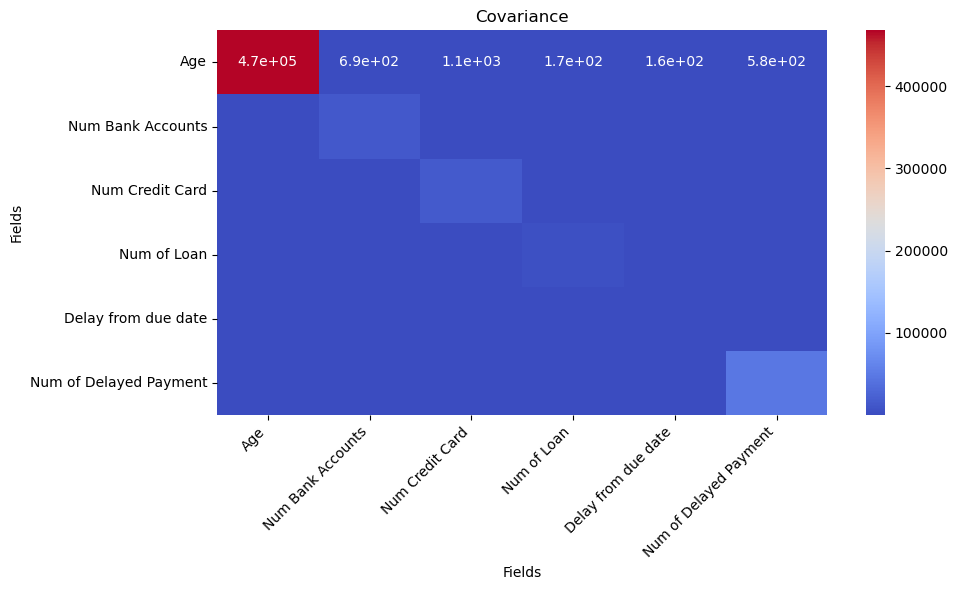

In [124]:

Fields = ['Age', 'Num Bank Accounts', 'Num Credit Card', 'Num of Loan', 'Delay from due date', 'Num of Delayed Payment']

covariance_matrix = financial_profile[Fields].cov()
plt.figure(figsize=(10, 6))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm')  # Adjust colormap as desired
plt.xlabel('Fields')
plt.ylabel('Fields')
plt.title('Covariance')
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)  
plt.tight_layout()
plt.show()

CORRELATION ANALYSIS

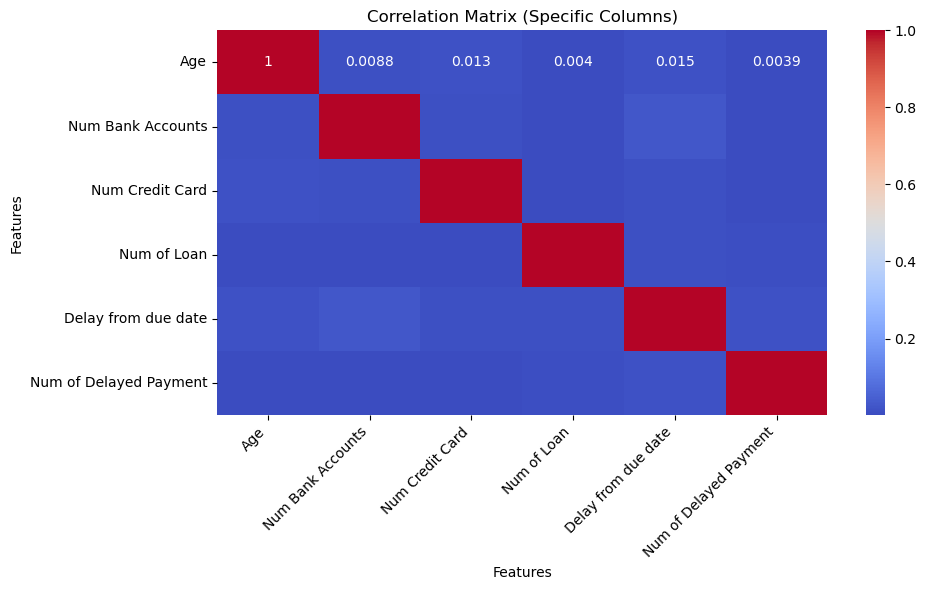

In [125]:
fields = ['Age', 'Num Bank Accounts', 'Num Credit Card', 'Num of Loan', 'Delay from due date', 'Num of Delayed Payment']

correlation_matrix = financial_profile[fields].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Matrix (Specific Columns)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)  
plt.tight_layout()
plt.show()

In [93]:
data_columns = ['Delay from due date','Num Credit Card','Age', 'Num Bank Accounts', 'Num of Delayed Payment', 'Num of Loan' ] 

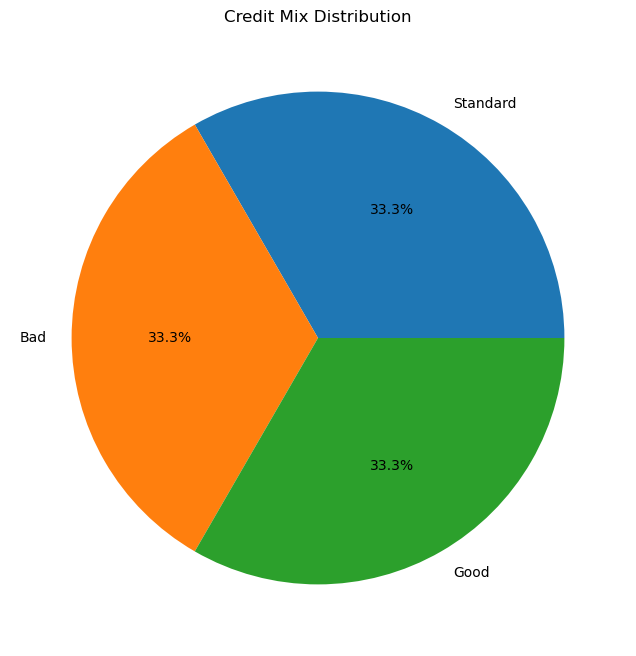

In [131]:
#Comparing the number of good/bad/standard credit
data = {'Credit Mix': ['Standard', 'Bad', 'Good']}
financial_profile = pd.DataFrame(data)
credit_categories = financial_profile['Credit Mix'].value_counts().sort_values(ascending=False)

category_labels = credit_categories.index.to_numpy()
category_counts = credit_categories.to_numpy()

plt.figure(figsize=(8, 8)) 
plt.pie(category_counts, labels=category_labels, autopct="%1.1f%%")
plt.title("Credit Mix Distribution")
plt.show()

DATA SKEWNESS ANALYSIS

In [143]:
financial_profile = pd.read_excel(r'Financial_Profile.xlsx', sheet_name='bank_data2')

Age                        9.149669
Num Bank Accounts         11.229521
Num Credit Card            8.293000
Num of Loan               18.100322
Delay from due date        0.894662
Num of Delayed Payment    14.520370
dtype: float64


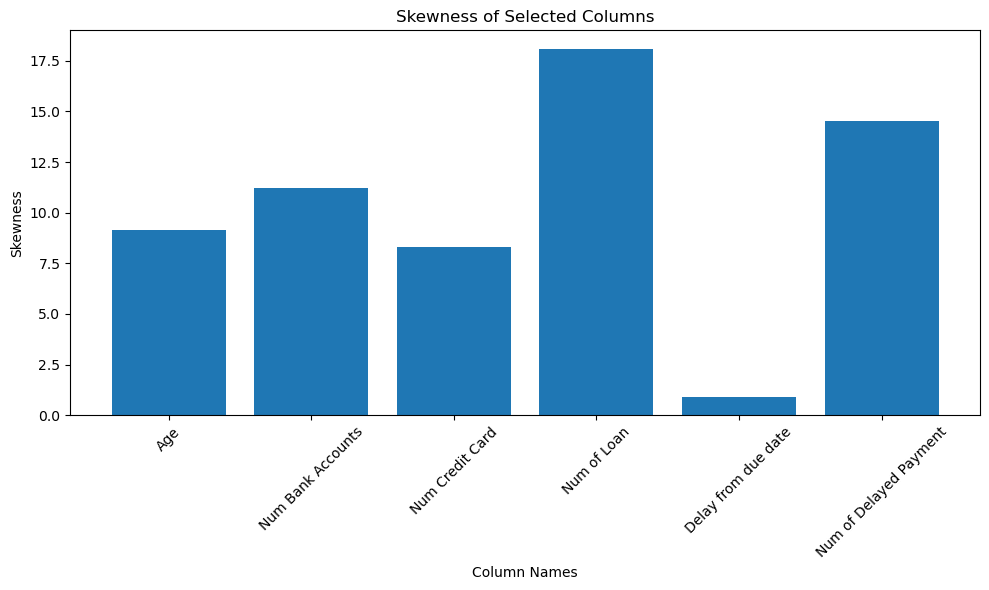

In [146]:
specific_columns = ['Age', 'Num Bank Accounts', 'Num Credit Card', 'Num of Loan', 'Delay from due date', 'Num of Delayed Payment']

skewness_values = financial_profile[specific_columns].skew()
print(skewness_values)

plt.figure(figsize=(10, 6))
plt.bar(skewness_values.index, skewness_values.values)
plt.xlabel("Column Names")
plt.ylabel("Skewness")
plt.title("Skewness of Selected Columns")
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

REFLECTION

Throught the completion of the two assignments provided to us, I can denote that there are key differences between excel and python for when performing some data analytics. What I noticed was that with excel, one can easily make an assumption about certain data outputs by just simply visualising or scanning through the data set. Excel is also easier when it comes to performing some calculations. It is great for analysing smaller datasets whereby you want to make a quick analysis without using complex functions in order to do so. 

On the contrary, I believe python is great for handling larger datasets and for performing a more in depth analysis of your data as its flexibility caters for a lot of functions one can use to derive insightful information. I believe its best to use if you want to perform some in-depth data exploration and manipulation. 

It was a bit challenging familiarising myself with the different statistical techniques/ functions in python as it was all new to me compared to excel functions. I had to do a lot of reasearch in order to know which functions were best suited for my dataset and what I wanted to showcase, however, I believe that I got to visualise my data much better using python than I did with excel.

If I were to re-do the assignment, I would firstly research about the dataset I have selected to get a more thorough understanding of what the topic is about and the 'talks'for that particular topic. I would then derive important elements that would be insightful according to my research to perform my analysis on and research the best functions and libraries to use to make the visual representation more appealing.

CONCLUSION

As per the Statistics, we can denote that loan trends throughout different professions demonstrate diverse patterns. Lawyers, engineers, and architects take out more loans, which might be due to higher salary levels or more expenses in these professions. Writers and musicians, on the contrary, have lower loans acceptance, which could suggest a lower salary or the need to rely on external financial support channels. 

Debt Consolidation Loans seem as the most prominent option among consumers, revealing the strong need for comprehensive financial management strategies and consolidation techniques in the community. While other loan categories, such as Personal Loans and Mortgage Loans, are prevalent they are less common, indicating a range of consumers' financial needs. 

Conversely, a substantial portion of the population demonstrates Bad credit repayment behaviour, indicating troubles with credit management and potential financial strain. Regardless of a significant number of people with Good credit payment behaviour, the seemingly minor disparity between Good and Bad credit behaviour conveys significant debt risks throughout the population, which calls for specific approaches to encourage financial responsibility.
